p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Male v.s. Female: Welch's t-test independent samples with Bonferroni correction, P_val=1.642e-01 stat=1.395e+00


<ipython-input-16-2d5197389e52>:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylab)


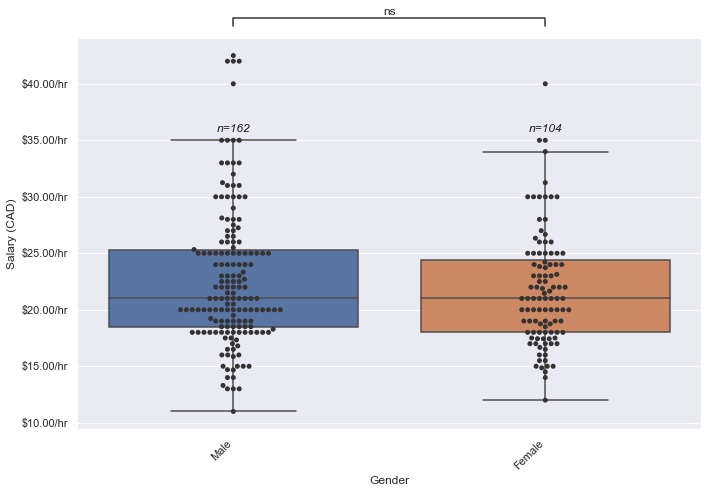

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import ttest_ind
from statannot import add_stat_annotation

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

data = pd.read_csv('responses.csv')
data.head()

female_salary_1a = data.loc[(data['currency_1a'] == "cad") & (data['gender'] == "Female")]['salary_1a']
female_salary_1b = data.loc[(data['currency_1b'] == "cad") & (data['gender'] == "Female")]['salary_1b']
female_salary_2a = data.loc[(data['currency_2a'] == "cad") & (data['gender'] == "Female")]['salary_2a']
female_salary_2b = data.loc[(data['currency_2b'] == "cad") & (data['gender'] == "Female")]['salary_2b']
female_salary_3a = data.loc[(data['currency_3a'] == "cad") & (data['gender'] == "Female")]['salary_3a']
female_salary_3b = data.loc[(data['currency_3b'] == "cad") & (data['gender'] == "Female")]['salary_3b']

female_salaries = female_salary_1a.append(
                  female_salary_1b, ignore_index=True).append(
                  female_salary_2a, ignore_index=True).append(
                  female_salary_2b, ignore_index=True).append(
                  female_salary_3a, ignore_index=True).append(
                  female_salary_3b, ignore_index=True)

male_salary_1a = data.loc[(data['currency_1a'] == "cad") & (data['gender'] == "Male")]['salary_1a']
male_salary_1b = data.loc[(data['currency_1b'] == "cad") & (data['gender'] == "Male")]['salary_1b']
male_salary_2a = data.loc[(data['currency_2a'] == "cad") & (data['gender'] == "Male")]['salary_2a']
male_salary_2b = data.loc[(data['currency_2b'] == "cad") & (data['gender'] == "Male")]['salary_2b']
male_salary_3a = data.loc[(data['currency_3a'] == "cad") & (data['gender'] == "Male")]['salary_3a']
male_salary_3b = data.loc[(data['currency_3b'] == "cad") & (data['gender'] == "Male")]['salary_3b']

male_salaries = male_salary_1a.append(
                male_salary_1b, ignore_index=True).append(
                male_salary_2a, ignore_index=True).append(
                male_salary_2b, ignore_index=True).append(
                male_salary_3a, ignore_index=True).append(
                male_salary_3b, ignore_index=True)

salaries = female_salaries.append(male_salaries, ignore_index=True)

genders = pd.Series(["Female" for i in range(len(female_salaries))]).append(
          pd.Series(["Male" for i in range(len(male_salaries))]), ignore_index=True)

df = pd.DataFrame({
    "Salary (CAD)": salaries,
    "Gender": genders
})

x = "Gender"
y = "Salary (CAD)"
order = ['Male','Female']

fig, ax = plt.subplots(figsize=(10,7))
p = sns.boxplot(x=x,y=y,order=order,data=df,showfliers=False)
p = sns.swarmplot(x=x,y=y,order=order,data=df,color=".2")
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')

max_sorted = []
for i in order:
    data = df[df[x] == i][y]
    q1, q3 = data.quantile([0.25,0.75])
    max_sorted.append(max(data.where(data <= q3 + 1.5*(q3-q1))))

ns = [df[x].tolist().count(i) for i in order]

for i,xtick in enumerate(p.get_xticks()):
    if i == 1:
        p.text(xtick,max_sorted[i]+1.7,'n='+str(ns[i]),horizontalalignment='center',color='k',style='italic')
    else:
        p.text(xtick,max_sorted[i]+0.7,'n='+str(ns[i]),horizontalalignment='center',color='k',style='italic')

add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("Male", "Female")],
                    test='t-test_welch', text_format='star', loc='outside', verbose=2)
        
fig.canvas.draw()
ylab = ['$'+str(lab.get_text())+'.00/hr' for lab in p.get_yticklabels()]
p.set_yticklabels(ylab)
plt.tight_layout()
plt.savefig('gender_cad.png')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Male v.s. Female: Welch's t-test independent samples with Bonferroni correction, P_val=7.598e-01 stat=3.073e-01


<ipython-input-18-6b20e9973c30>:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylab)


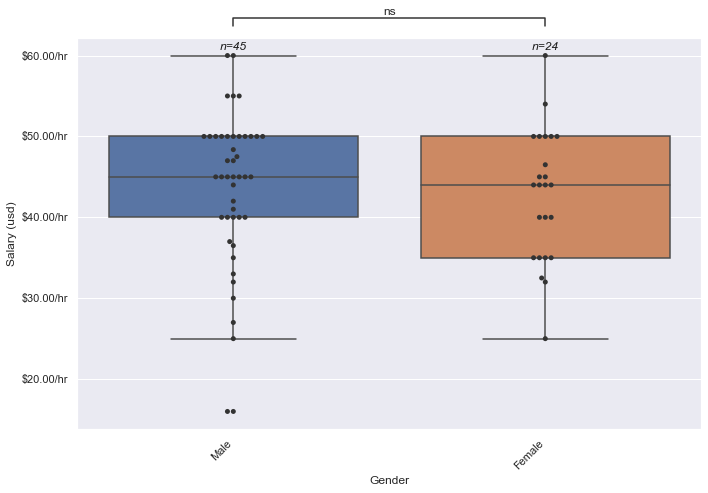

In [18]:
data = pd.read_csv('responses.csv')
data.head()

female_salary_1a = data.loc[(data['currency_1a'] == "usd") & (data['gender'] == "Female")]['salary_1a']
female_salary_1b = data.loc[(data['currency_1b'] == "usd") & (data['gender'] == "Female")]['salary_1b']
female_salary_2a = data.loc[(data['currency_2a'] == "usd") & (data['gender'] == "Female")]['salary_2a']
female_salary_2b = data.loc[(data['currency_2b'] == "usd") & (data['gender'] == "Female")]['salary_2b']
female_salary_3a = data.loc[(data['currency_3a'] == "usd") & (data['gender'] == "Female")]['salary_3a']
female_salary_3b = data.loc[(data['currency_3b'] == "usd") & (data['gender'] == "Female")]['salary_3b']

female_salaries = female_salary_1a.append(
                  female_salary_1b, ignore_index=True).append(
                  female_salary_2a, ignore_index=True).append(
                  female_salary_2b, ignore_index=True).append(
                  female_salary_3a, ignore_index=True).append(
                  female_salary_3b, ignore_index=True)

male_salary_1a = data.loc[(data['currency_1a'] == "usd") & (data['gender'] == "Male")]['salary_1a']
male_salary_1b = data.loc[(data['currency_1b'] == "usd") & (data['gender'] == "Male")]['salary_1b']
male_salary_2a = data.loc[(data['currency_2a'] == "usd") & (data['gender'] == "Male")]['salary_2a']
male_salary_2b = data.loc[(data['currency_2b'] == "usd") & (data['gender'] == "Male")]['salary_2b']
male_salary_3a = data.loc[(data['currency_3a'] == "usd") & (data['gender'] == "Male")]['salary_3a']
male_salary_3b = data.loc[(data['currency_3b'] == "usd") & (data['gender'] == "Male")]['salary_3b']

male_salaries = male_salary_1a.append(
                male_salary_1b, ignore_index=True).append(
                male_salary_2a, ignore_index=True).append(
                male_salary_2b, ignore_index=True).append(
                male_salary_3a, ignore_index=True).append(
                male_salary_3b, ignore_index=True)

salaries = female_salaries.append(male_salaries, ignore_index=True)

genders = pd.Series(["Female" for i in range(len(female_salaries))]).append(
          pd.Series(["Male" for i in range(len(male_salaries))]), ignore_index=True)

df = pd.DataFrame({
    "Salary (usd)": salaries,
    "Gender": genders
})

x = "Gender"
y = "Salary (usd)"
order = ['Male','Female']

fig, ax = plt.subplots(figsize=(10,7))
p = sns.boxplot(x=x,y=y,order=order,data=df,showfliers=False)
p = sns.swarmplot(x=x,y=y,order=order,data=df,color=".2")
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')

max_sorted = []
for i in order:
    data = df[df[x] == i][y]
    q1, q3 = data.quantile([0.25,0.75])
    max_sorted.append(max(data.where(data <= q3 + 1.5*(q3-q1))))

ns = [df[x].tolist().count(i) for i in order]

for i,xtick in enumerate(p.get_xticks()):
    p.text(xtick,max_sorted[i]+0.7,'n='+str(ns[i]),horizontalalignment='center',color='k',style='italic')

add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("Male", "Female")],
                    test='t-test_welch', text_format='star', loc='outside', verbose=2)
        
fig.canvas.draw()
ylab = ['$'+str(lab.get_text())+'.00/hr' for lab in p.get_yticklabels()]
p.set_yticklabels(ylab)
plt.tight_layout()
plt.savefig('gender_usd.png')